In [75]:
from __future__ import division

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from astropy import constants as const
import astropy.units as u
from sklearn.neighbors import KernelDensity
import palettable
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import LeaveOneOut
cs = palettable.colorbrewer.qualitative.Set1_9.mpl_colors
from astropy.table import Table 


In [2]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 
df = df[df.OIII_FLAG_2 > 0]
df = df[df.OIII_EQW_FLAG == 0]
df = df[df.OIII_BAD_FIT_FLAG == 0]
df = df[df.FE_FLAG == 0]
df = df[df.OIII_EXTREM_FLAG == 0]

df = df[df.OIII_SNR_FLAG == 0] # Really should do this on OIII_FIT_Z_FULL_OIII_PEAK? Also, when I've finished calculating it
# just look at the fractional error, since that would be a lot simpler. 

# df = df[df.OIII_FIT_HB_Z_FLAG == 1] # need to relax this 

x = const.c.to(u.km/u.s)*(df.OIII_FIT_Z_FULL_OIII_PEAK - df.OIII_FIT_HB_Z)/(1.0 + df.OIII_FIT_Z_FULL_OIII_PEAK)

norm = np.std(x)
x = x / norm

x_d = np.linspace(-4, 4, 1000)

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut(len(x)))
grid.fit(x[:, None]);

grid.best_params_



{'bandwidth': 0.36783797718286343}

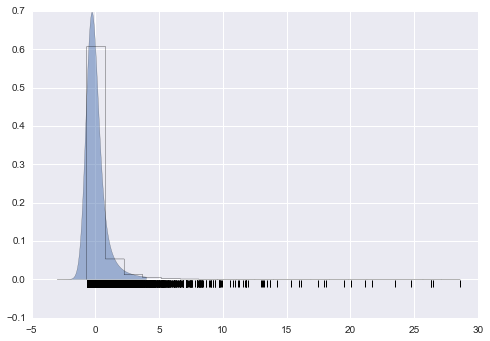

In [148]:
kde = KernelDensity(bandwidth=0.4, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

n, bins, patches = plt.hist(x,
        histtype='step',
        color='black',
        bins=20,
        zorder=1,
        normed=True)



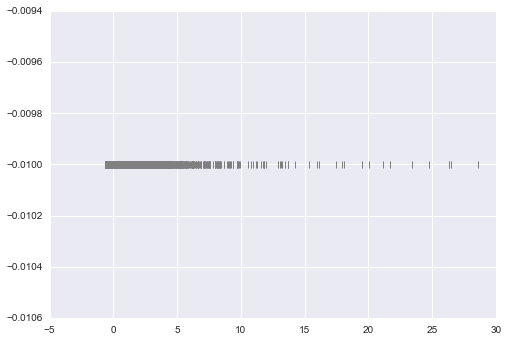

In [158]:
fig, ax = plt.subplots()

ax.plot(x, np.full_like(x, -0.01), marker='|', markeredgecolor='grey', linestyle='', markeredgewidth=1)


Peak at 0 is suspicious 



In [ ]:
print df.REDCHI.sort_values(ascending=False).head

In [8]:
df_nir = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 
df_nir = df_nir[df_nir.OIII_FLAG_2 > 0]
df_nir = df_nir[df_nir.OIII_BAD_FIT_FLAG == 0]
df_nir = df_nir[df_nir.FE_FLAG == 0]

df_nir['LOGLBOL'] = np.log10(9.26) + df_nir.LogL5100
df_nir.rename(columns={'OIII_5007_EQW_3': 'EW_OIII_5007'}, inplace=True)
df_nir.reset_index(inplace=True)
df_nir = df_nir[['LOGLBOL', 'EW_OIII_5007']]

# need to fix upper limits 

t = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits')
t = t[t['LOGLBOL'] > 0.0]
t = t[t['EW_OIII_5007'] > 0.0]
t = t[['LOGLBOL', 'EW_OIII_5007']]
df_sdss = t.to_pandas()

df = pd.concat([df, df_sdss], ignore_index=True)

df['LOG_EW_OIII_5007'] = np.log10(df['EW_OIII_5007'])

# df.loc[df.LOG_EW_OIII_5007 < 0.0, 'LOG_EW_OIII_5007'] = 0.0 # not great because these could be significant
# df.sort_values('LOGLBOL', inplace=True)

/data/lc585/venv/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log10


In [ ]:
t = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits')

t = t[t['LOGLBOL'] > 0.0]
t = t[t['EW_OIII_5007'] > 0.0]
t = t[t['EW_OIII_5007_ERR'] < 1e3] # one with extreme value 

0.0 83.6082801121


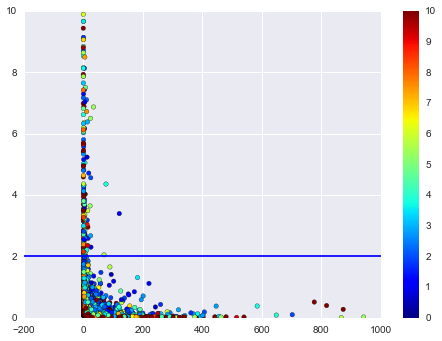

In [31]:
# print t['LINE_MED_SN_HB']

plt.scatter(t['EW_OIII_5007'], t['EW_OIII_5007_ERR'] / t['EW_OIII_5007'], c=t['LINE_MED_SN_HB'], vmin=0.0, vmax=10, cmap='jet')
plt.colorbar()
print np.min(t['LINE_MED_SN_HB']), np.max(t['LINE_MED_SN_HB'])
plt.ylim(0, 10)
plt.axhline(2.0)

/data/lc585/venv/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10


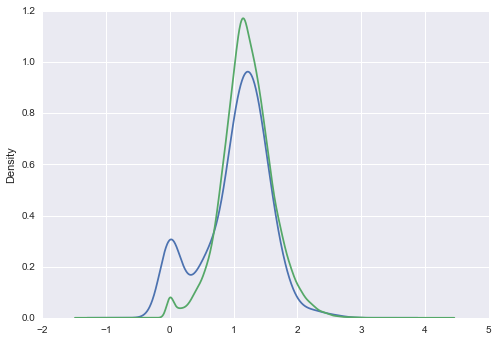

In [110]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 
df = df[df.OIII_FLAG_2 > 0]
df = df[df.OIII_BAD_FIT_FLAG == 0]
df = df[df.FE_FLAG == 0]

df['LOGLBOL'] = np.log10(9.26) + df.LogL5100
df.rename(columns={'OIII_5007_EQW_3': 'EW_OIII_5007'}, inplace=True)
df.reset_index(inplace=True)
df = df[['LOGLBOL', 'EW_OIII_5007']]

df['LOG_EW_OIII_5007'] = np.log10(df['EW_OIII_5007'])
df.loc[df.LOG_EW_OIII_5007 < 0.0, 'LOG_EW_OIII_5007'] = 0.0 

df.sort_values('LOGLBOL', inplace=True)

# need to fix upper limits 

t = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits')
t = t[t['LOGLBOL'] > 0.0]
t = t[t['EW_OIII_5007'] > 0.0]
t = t[['LOGLBOL', 'EW_OIII_5007']]
df_sdss = t.to_pandas()

df_sdss['LOG_EW_OIII_5007'] = np.log10(df_sdss['EW_OIII_5007'])
df_sdss.loc[df_sdss.LOG_EW_OIII_5007 < 0.0, 'LOG_EW_OIII_5007'] = 0.0 

df_sdss.sort_values('LOGLBOL', inplace=True)

fig, ax = plt.subplots()

df.LOG_EW_OIII_5007.plot(kind='kde', ax=ax)
df_sdss.LOG_EW_OIII_5007.plot(kind='kde', ax=ax)
        

NIR max: 15.0984577662
Bandwidth: 16.0662110809
SDSS max: 15.3236098735


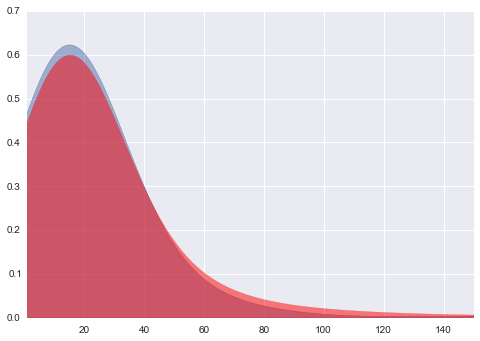

In [85]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 

df = df[df.OIII_FLAG_2 > 0]
df = df[df.OIII_BAD_FIT_FLAG == 0]
df = df[df.FE_FLAG == 0]
df = df[df.OIII_5007_EQW_3 > 1.0]

df['LOGLBOL'] = np.log10(9.26) + df.LogL5100
df.rename(columns={'OIII_5007_EQW_3': 'EW_OIII_5007'}, inplace=True)
df.reset_index(inplace=True)
df = df[['LOGLBOL', 'EW_OIII_5007']]
df['LOG_EW_OIII_5007'] = np.log10(df['EW_OIII_5007'])

df.sort_values('LOGLBOL', inplace=True)

x = df.EW_OIII_5007.values

std = np.std(x)
mean = np.mean(x)

x = (x - mean) / std

x_d = np.linspace(-3, 4, 1000)

if False:
    
    bandwidths = 10 ** np.linspace(-2, 0, 100)
    grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                        {'bandwidth': bandwidths},
                        cv=LeaveOneOut(len(x)))
    grid.fit(x[:, None]);

    print grid.best_params_
    
kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d * std + mean, np.exp(logprob), alpha=0.5)

print 'NIR max: {}'.format(x_d[np.exp(logprob).argmax()] * std + mean)
# plt.axvline(x_d[np.exp(logprob).argmax()] * std + mean)

t = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits')
t = t[t['LOGLBOL'] > 0.0]
t = t[t['EW_OIII_5007'] > 0.0]
t = t[['LOGLBOL', 'EW_OIII_5007']]
df_sdss = t.to_pandas()

df_sdss['LOG_EW_OIII_5007'] = np.log10(df_sdss['EW_OIII_5007'])
df_sdss = df_sdss[df_sdss.EW_OIII_5007 > 1.0]

df_sdss.sort_values('LOGLBOL', inplace=True)

x = df_sdss.EW_OIII_5007.values

x = (x - mean) / std

kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde.fit(x[:, None])

print 'Bandwidth: {}'.format(0.5 * std) 
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d * std + mean, np.exp(logprob), alpha=0.5, color='red')

plt.xlim(1, 150)

print 'SDSS max: {}'.format(x_d[np.exp(logprob).argmax()] * std + mean)
# plt.axvline(x_d[np.exp(logprob).argmax()] * std + mean)

# plt.savefig('/home/lc8figure1.png')

only objects with EQW > 1A (not sure about upper limits)

In [80]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 

df = df[df.OIII_FLAG_2 > 0]
df = df[df.OIII_BAD_FIT_FLAG == 0]
df = df[df.FE_FLAG == 0]

print len(df[df.OIII_5007_EQW_3 < 1.0]) / len(df)

t = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits')
t = t[t['LOGLBOL'] > 0.0]
t = t[t['EW_OIII_5007'] > 0.0]
t = t[['LOGLBOL', 'EW_OIII_5007']]
df_sdss = t.to_pandas()

print len(df_sdss[df_sdss.EW_OIII_5007 < 1.0]) / len(df_sdss)

0.10303030303
0.00900159705754


In [35]:
10 ** np.linspace(-1, 1, 100)

array([  0.1       ,   0.10476158,   0.10974988,   0.1149757 ,
         0.12045035,   0.12618569,   0.13219411,   0.13848864,
         0.14508288,   0.15199111,   0.15922828,   0.16681005,
         0.17475284,   0.18307383,   0.19179103,   0.2009233 ,
         0.21049041,   0.22051307,   0.23101297,   0.24201283,
         0.25353645,   0.26560878,   0.27825594,   0.29150531,
         0.30538555,   0.31992671,   0.33516027,   0.35111917,
         0.36783798,   0.38535286,   0.40370173,   0.42292429,
         0.44306215,   0.46415888,   0.48626016,   0.5094138 ,
         0.53366992,   0.55908102,   0.58570208,   0.61359073,
         0.64280731,   0.67341507,   0.70548023,   0.7390722 ,
         0.77426368,   0.81113083,   0.84975344,   0.89021509,
         0.93260335,   0.97700996,   1.02353102,   1.07226722,
         1.12332403,   1.17681195,   1.23284674,   1.29154967,
         1.35304777,   1.41747416,   1.48496826,   1.55567614,
         1.62975083,   1.70735265,   1.78864953,   1.87

(44, 49)

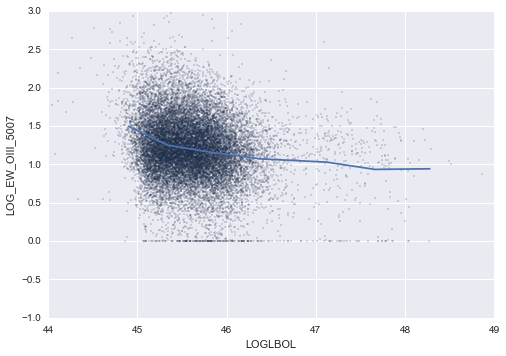

In [92]:


fig, ax = plt.subplots()

df.plot(kind='scatter', 
        x='LOGLBOL', 
        y='LOG_EW_OIII_5007',
        ax=ax,
        s=1,
        alpha=0.4)



# plt.plot(df.LOGLBOL.rolling(window=101).mean(), df.LOG_EW_OIII_5007.rolling(window=101).mean())

ax.set_ylim(-1, 3)
ax.set_xlim(44, 49)

(44, 49)

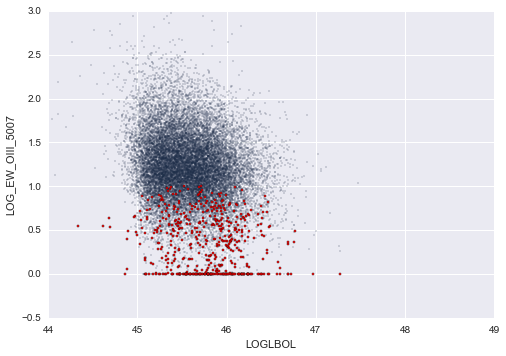

In [89]:
t = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits')
t = t[t['LOGLBOL'] > 0.0]
t = t[t['EW_OIII_5007'] > 0.0]
t = t[['LOGLBOL', 'EW_OIII_5007', 'EW_OIII_5007_ERR']]
df_sdss = t.to_pandas()

df_sdss['UPLIM'] = 0
df_sdss.loc[df_sdss['EW_OIII_5007'] < df_sdss['EW_OIII_5007_ERR'], 'UPLIM'] = 1
df_sdss.loc[df_sdss['EW_OIII_5007'] > 10.0, 'UPLIM'] = 0 # only when line is weak

df_sdss['LOG_EW_OIII_5007'] = np.log10(df_sdss['EW_OIII_5007'])
df_sdss.loc[df_sdss.LOG_EW_OIII_5007 < 0.0, 'LOG_EW_OIII_5007'] = 0.0 

grouped = df_sdss.groupby('UPLIM')

df_uplim = grouped.get_group(1)
df_sdss = grouped.get_group(0)

fig, ax = plt.subplots()

df_sdss.plot(kind='scatter', 
             x='LOGLBOL', 
             y='LOG_EW_OIII_5007',
             ax=ax,
             s=1,
             alpha=0.4)

df_uplim.plot(kind='scatter', 
              x='LOGLBOL', 
              y='LOG_EW_OIII_5007',
              ax=ax,
              s=5,
              alpha=1.0,
              color='red')

ax.set_ylim(-0.5, 3)
ax.set_xlim(44, 49)

0.108974358974


(0.5, 100.0)

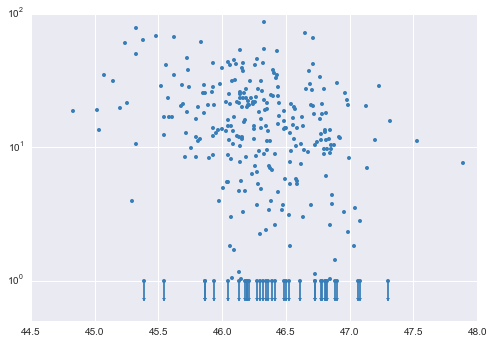

In [147]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0)   

df = df[df.OIII_FLAG_2 > 0]
df = df[df.OIII_BAD_FIT_FLAG == 0]
df = df[df.FE_FLAG == 0]
df = df[df.OIII_EXTREM_FLAG == 0]

# significant = df.OIII_5007_EQW_3 > 1.0*(df.OIII_5007_EQW_MODEL_P84 - df.OIII_5007_EQW_MODEL_P50)

fig, ax = plt.subplots()

df1 = df[df.OIII_5007_EQW_3 > 1] 
df2 = df[df.OIII_5007_EQW_3 <= 1] 

ax.plot(df1.LogL5100,
        df1.OIII_5007_EQW_3,
        marker='o',
        linestyle='',
        color=cs[1],
        markersize=4)

ax.errorbar(df2.LogL5100,
            np.ones_like(df2.LogL5100),
            yerr=0.3, 
            uplims=True,
            marker='o',
            linestyle='',
            capsize=2,
            color=cs[1],
            markersize=4)

# ax.errorbar(df.loc[significant == False, 'LogL5100'],
#             df.loc[significant == False, 'OIII_5007_EQW_MODEL_P84'],
#             yerr = 0.2,
#             uplims=True,
#             capsize=2,
#             marker='o',
#             linestyle='',
#             markersize=4)



ax.set_yscale('log')

print len(df2) / len(df)
ax.set_ylim(5e-1, 1e2)


/data/lc585/venv/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide
/data/lc585/venv/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


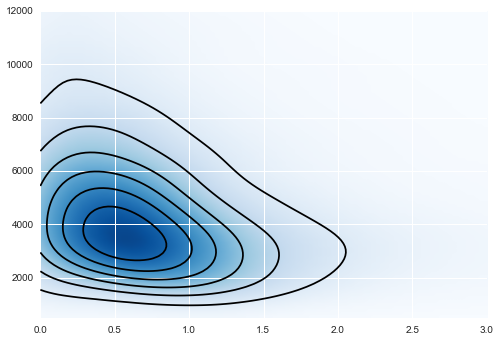

In [170]:
from scipy import stats 
from PlottingTools.kde_contours import kde_contours

fig, ax = plt.subplots() 

t = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits') 

xi = t['EW_FE_HB_4434_4684'] / t['EW_BROAD_HB']
yi = t['FWHM_BROAD_HB'] 

drop = np.isnan(xi) | np.isnan(yi) | np.isinf(xi) | np.isinf(yi)

xi = xi[~drop]
yi = yi[~drop]

xmin = 0.0
xmax = 3.0
ymin = 500.0
ymax = 12000.0 

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([xi, yi])

kernel = stats.gaussian_kde(values)

Z = np.reshape(kernel(positions).T, X.shape)

ax.imshow(np.flipud(Z.T), 
          extent=(xmin, xmax, ymin, ymax), 
          aspect='auto', 
          zorder=0, 
          cmap='Blues',
          vmax=0.00015)

kde_contours(xi, 
             yi, 
             ax, 
             color='black',
             lims=[xmin, xmax, ymin, ymax],
             plotpoints=False)

(500.0, 12000.0)

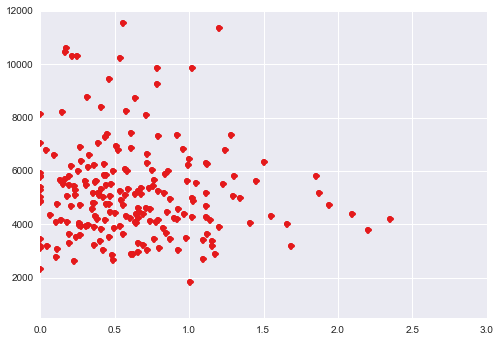

In [174]:
fig, ax = plt.subplots() 

df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 
df = df[df.OIII_FLAG_2 > 0]
df = df[df.OIII_BAD_FIT_FLAG == 0]
df = df[df.FE_FLAG == 0]

df = df[df.WARN_Hb == 0]

df = df[df.INSTR != 'ISAAC'] # don't have wavelength coverage to constrain Fe 

ax.plot(df.EQW_FE_4434_4684 / df.EQW_Broad_Hb,
        df.FWHM_Broad_Hb,
        linestyle='',
        marker='o',
        markerfacecolor=cs[0])

xmin = 0.0
xmax = 3.0
ymin = 500.0
ymax = 12000.0 

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)    

/data/lc585/venv/lib/python2.7/site-packages/ipykernel/__main__.py:113: RuntimeWarning: divide by zero encountered in true_divide
/data/lc585/venv/lib/python2.7/site-packages/ipykernel/__main__.py:113: RuntimeWarning: invalid value encountered in true_divide


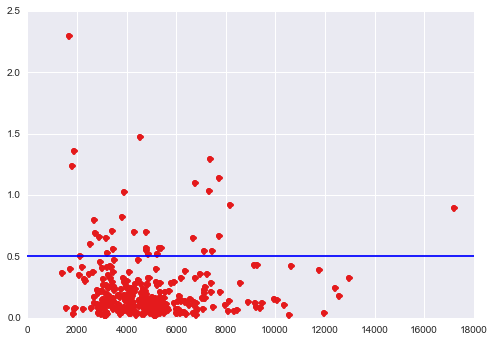

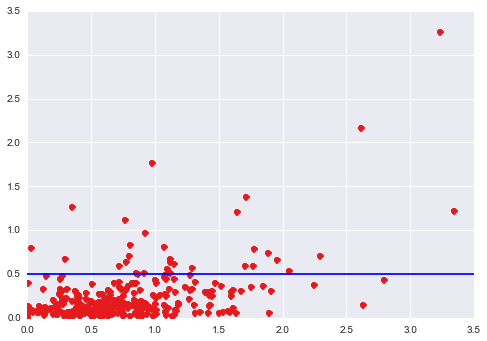

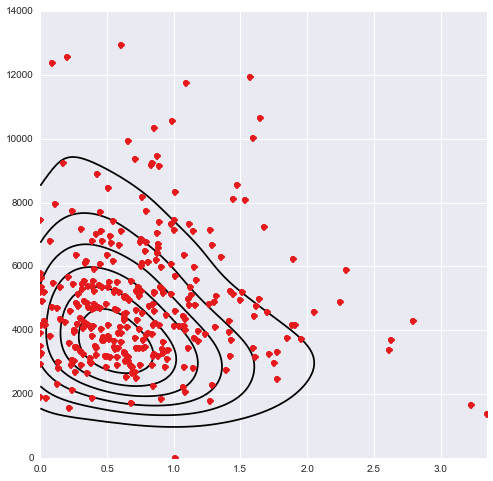

In [304]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 

df = df[df.OIII_FIT_HB_Z_FLAG > 0] # removes missing hb  
df['OIII_FIT_FE_STRENGTH'] = df.OIII_FIT_EQW_FE_4434_4684 / df.OIII_FIT_HB_BROAD_EQW

# Missing Fe --------------------

from fit_properties_oiii_fire import get_line_fit_props as get_line_fit_props_fire
from fit_properties_oiii_gnirs import get_line_fit_props as get_line_fit_props_gnirs
from fit_properties_oiii_isaac import get_line_fit_props as get_line_fit_props_isaac
from fit_properties_oiii_liris import get_line_fit_props as get_line_fit_props_liris
from fit_properties_oiii_niri import get_line_fit_props as get_line_fit_props_niri
from fit_properties_oiii_nirspec import get_line_fit_props as get_line_fit_props_nirspec
from fit_properties_oiii_sofi_jh import get_line_fit_props as get_line_fit_props_sofi_jh
from fit_properties_oiii_sofi_lc import get_line_fit_props as get_line_fit_props_sofi_lc
from fit_properties_oiii_triple import get_line_fit_props as get_line_fit_props_triple
from fit_properties_oiii_triple_shen15 import get_line_fit_props as get_line_fit_props_triple_shen15
from fit_properties_oiii_xshooter import get_line_fit_props as get_line_fit_props_xshooter
from fit_properties_oiii_sinfoni import get_line_fit_props as get_line_fit_props_sinfoni
from fit_properties_oiii_sinfoni_kurk import get_line_fit_props as get_line_fit_props_sinfoni_kurk

from SpectraTools.fit_line import wave2doppler, doppler2wave

q_fire = get_line_fit_props_fire().all_quasars() 
q_gnirs = get_line_fit_props_gnirs().all_quasars() 
q_isaac = get_line_fit_props_isaac().all_quasars() 
q_liris = get_line_fit_props_liris().all_quasars() 
q_niri = get_line_fit_props_niri().all_quasars() 
q_nirspec = get_line_fit_props_nirspec().all_quasars() 
q_sofi_jh = get_line_fit_props_sofi_jh().all_quasars() 
q_sofi_lc = get_line_fit_props_sofi_lc().all_quasars() 
q_triple = get_line_fit_props_triple().all_quasars() 
q_triple_shen15 = get_line_fit_props_triple_shen15().all_quasars() 
q_xshooter = get_line_fit_props_xshooter().all_quasars() 
q_sinfoni = get_line_fit_props_sinfoni().all_quasars()
q_sinfoni_kurk = get_line_fit_props_sinfoni_kurk().all_quasars()

q = q_fire + q_gnirs + q_isaac + q_liris + q_niri + q_nirspec + q_sofi_jh + q_sofi_lc + q_triple + q_triple_shen15 + q_xshooter + q_sinfoni + q_sinfoni_kurk

names = np.array([qi.name for qi in q])

w0=4862.721*u.AA

for idx, row in df.iterrows():
     
    qi = q[np.where(names == idx)[0][0]]
    
    continuum_region = qi.continuum_region[0] 
    
    if continuum_region.unit == (u.km/u.s):
        continuum_region = doppler2wave(continuum_region, w0)

    df.ix[idx, 'intersection'] = len(set(range(int(continuum_region.value[0]), int(continuum_region.value[1]))).intersection(range(4434, 4684)))
    
        
df = df[df.intersection > 150.0] # about half the full region (250 pixels)

df.drop('QSO509', inplace=True) # no fe region


df.dropna(subset=['OIII_FIT_FE_STRENGTH_ERR'], inplace=True) 
# removes two with nan's, but fe clearly poorly 
# constrained so just drop

# ---------------------------------------------------------------

fig, ax = plt.subplots()

y = df.OIII_FIT_HB_BROAD_FWHM
yerr = df.OIII_FIT_HB_BROAD_FWHM_ERR / df.OIII_FIT_HB_BROAD_FWHM 

ax.plot(y,
        yerr, 
        linestyle='',
        marker='o',
        markerfacecolor=cs[0])

ax.axhline(0.5)



fig, ax = plt.subplots()

x = df.OIII_FIT_FE_STRENGTH
xerr = df.OIII_FIT_FE_STRENGTH_ERR

ax.plot(x,
        xerr, 
        linestyle='',
        marker='o',
        markerfacecolor=cs[0])

ax.axhline(0.5)



# good = (yerr < 0.4) & (xerr < 0.4)
# df = df[good]

fig, ax = plt.subplots(figsize=(8,8))

ax.plot(df.OIII_FIT_FE_STRENGTH,
        df.OIII_FIT_HB_BROAD_FWHM,
        linestyle='',
        marker='o',
        markerfacecolor=cs[0])


# SDSS ---------------------------------------------------------------

t = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits') 

xi = t['EW_FE_HB_4434_4684'] / t['EW_BROAD_HB']
yi = t['FWHM_BROAD_HB'] 

drop = np.isnan(xi) | np.isnan(yi) | np.isinf(xi) | np.isinf(yi)

xi = xi[~drop]
yi = yi[~drop]

xmin = 0.0
xmax = 3.0
ymin = 500.0
ymax = 12000.0 

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([xi, yi])

kernel = stats.gaussian_kde(values)

Z = np.reshape(kernel(positions).T, X.shape)


kde_contours(xi, 
             yi, 
             ax, 
             color='black',
             lims=[xmin, xmax, ymin, ymax],
             plotpoints=False)


xmin = None
xmax = None
ymin = None
ymax = 14000

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax) 

fig.savefig('/home/lc585/Desktop/figure2.png')



In [310]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 

df = df[df.OIII_FIT_HB_Z_FLAG > 0] # removes missing hb  
print df[df.ID.duplicated(keep=False)].ID.sort_values()


QSO330    J000345-232353
QSO552    J000345-232353
QSO560    J005202+010129
QSO461    J005202+010129
QSO585    J024008-230915
QSO424    J024008-230915
QSO589    J025634-401300
QSO409    J025634-401300
QSO115    J030450-000813
QSO518    J030450-000813
QSO348    J042645-520819
QSO595    J042645-520819
QSO332    J055246-363728
QSO349    J055246-363728
QSO372    J094202+042244
QSO527    J094202+042244
QSO379    J103456+035900
QSO532    J103456+035900
QSO132    J104122+563001
QSO040    J104122+563001
QSO394    J104915-011038
QSO015    J104915-011038
QSO395    J111119+133604
QSO384    J111119+133604
QSO137    J114254+265457
QSO391    J114254+265457
QSO635    J121911-004346
QSO606    J121911-004346
QSO146    J130525+031135
QSO088    J130525+031135
QSO203    J133255+005251
QSO373    J133255+005251
QSO610    J133322+005824
QSO539    J133322+005824
QSO179    J142054+160333
QSO048    J142054+160333
QSO152    J144516+095836
QSO236    J144516+095836
QSO053    J162549+264659
QSO162    J162549+264659


/data/lc585/venv/lib/python2.7/site-packages/ipykernel/__main__.py:113: RuntimeWarning: divide by zero encountered in true_divide
/data/lc585/venv/lib/python2.7/site-packages/ipykernel/__main__.py:113: RuntimeWarning: invalid value encountered in true_divide


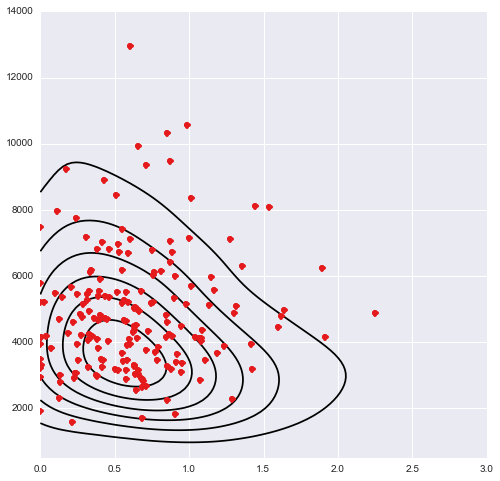

In [279]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 

df = df[df.OIII_FIT_HB_Z_FLAG > 0] # removes missing hb  
df['OIII_FIT_FE_STRENGTH'] = df.OIII_FIT_EQW_FE_4434_4684 / df.OIII_FIT_HB_BROAD_EQW

# Missing Fe --------------------

from fit_properties_oiii_fire import get_line_fit_props as get_line_fit_props_fire
from fit_properties_oiii_gnirs import get_line_fit_props as get_line_fit_props_gnirs
from fit_properties_oiii_isaac import get_line_fit_props as get_line_fit_props_isaac
from fit_properties_oiii_liris import get_line_fit_props as get_line_fit_props_liris
from fit_properties_oiii_niri import get_line_fit_props as get_line_fit_props_niri
from fit_properties_oiii_nirspec import get_line_fit_props as get_line_fit_props_nirspec
from fit_properties_oiii_sofi_jh import get_line_fit_props as get_line_fit_props_sofi_jh
from fit_properties_oiii_sofi_lc import get_line_fit_props as get_line_fit_props_sofi_lc
from fit_properties_oiii_triple import get_line_fit_props as get_line_fit_props_triple
from fit_properties_oiii_triple_shen15 import get_line_fit_props as get_line_fit_props_triple_shen15
from fit_properties_oiii_xshooter import get_line_fit_props as get_line_fit_props_xshooter
from fit_properties_oiii_sinfoni import get_line_fit_props as get_line_fit_props_sinfoni
from fit_properties_oiii_sinfoni_kurk import get_line_fit_props as get_line_fit_props_sinfoni_kurk

from SpectraTools.fit_line import wave2doppler, doppler2wave

q_fire = get_line_fit_props_fire().all_quasars() 
q_gnirs = get_line_fit_props_gnirs().all_quasars() 
q_isaac = get_line_fit_props_isaac().all_quasars() 
q_liris = get_line_fit_props_liris().all_quasars() 
q_niri = get_line_fit_props_niri().all_quasars() 
q_nirspec = get_line_fit_props_nirspec().all_quasars() 
q_sofi_jh = get_line_fit_props_sofi_jh().all_quasars() 
q_sofi_lc = get_line_fit_props_sofi_lc().all_quasars() 
q_triple = get_line_fit_props_triple().all_quasars() 
q_triple_shen15 = get_line_fit_props_triple_shen15().all_quasars() 
q_xshooter = get_line_fit_props_xshooter().all_quasars() 
q_sinfoni = get_line_fit_props_sinfoni().all_quasars()
q_sinfoni_kurk = get_line_fit_props_sinfoni_kurk().all_quasars()

q = q_fire + q_gnirs + q_isaac + q_liris + q_niri + q_nirspec + q_sofi_jh + q_sofi_lc + q_triple + q_triple_shen15 + q_xshooter + q_sinfoni + q_sinfoni_kurk

names = np.array([qi.name for qi in q])

w0=4862.721*u.AA

for idx, row in df.iterrows():
     
    qi = q[np.where(names == idx)[0][0]]
    
    continuum_region = qi.continuum_region[0] 
    
    if continuum_region.unit == (u.km/u.s):
        continuum_region = doppler2wave(continuum_region, w0)

    df.ix[idx, 'intersection'] = len(set(range(int(continuum_region.value[0]), int(continuum_region.value[1]))).intersection(range(4434, 4684)))
    
        
df = df[df.intersection > 150.0] # about half the full region (250 pixels)

df.drop('QSO509', inplace=True) # no fe region

# ---------------------------------------------------------------

# fig, ax = plt.subplots()

# y = df.OIII_FIT_HB_BROAD_FWHM
# yerr = df.OIII_FIT_HB_BROAD_FWHM_ERR / df.OIII_FIT_HB_BROAD_FWHM 

# ax.plot(y,
#         yerr, 
#         linestyle='',
#         marker='o',
#         markerfacecolor=cs[0])

# ax.axhline(0.4)



# fig, ax = plt.subplots()

# x = df.OIII_FIT_FE_STRENGTH
# xerr = df.OIII_FIT_FE_STRENGTH_ERR

# ax.plot(x,
#         xerr, 
#         linestyle='',
#         marker='o',
#         markerfacecolor=cs[0])

# ax.axhline(0.4)


good = (yerr < 0.4) & (xerr < 0.4)
df = df[good]

fig, ax = plt.subplots(figsize=(8,8))

ax.plot(df.OIII_FIT_FE_STRENGTH,
        df.OIII_FIT_HB_BROAD_FWHM,
        linestyle='',
        marker='o',
        markerfacecolor=cs[0])


# ax.plot(df.ix['QSO098'].OIII_FIT_EQW_FE_4434_4684 / df.ix['QSO098'].OIII_FIT_HB_BROAD_EQW,
#         df.ix['QSO098'].OIII_FIT_HB_BROAD_FWHM,
#         linestyle='',
#         marker='o',
#         markerfacecolor=cs[1])

# SDSS ---------------------------------------------------------------

t = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits') 

xi = t['EW_FE_HB_4434_4684'] / t['EW_BROAD_HB']
yi = t['FWHM_BROAD_HB'] 

drop = np.isnan(xi) | np.isnan(yi) | np.isinf(xi) | np.isinf(yi)

xi = xi[~drop]
yi = yi[~drop]

xmin = 0.0
xmax = 3.0
ymin = 500.0
ymax = 12000.0 

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([xi, yi])

kernel = stats.gaussian_kde(values)

Z = np.reshape(kernel(positions).T, X.shape)


kde_contours(xi, 
             yi, 
             ax, 
             color='black',
             lims=[xmin, xmax, ymin, ymax],
             plotpoints=False)


xmin = None
xmax = None
ymin = None
ymax = 14000

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax) 

fig.savefig('/home/lc585/Desktop/figure2.png')

In [266]:
# 509 no fe region
# 572 narrow?



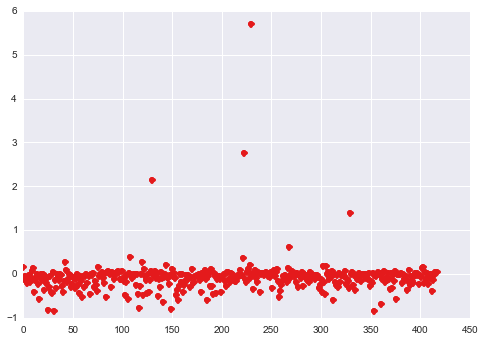

In [222]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 

df = df[df.OIII_FIT_HB_Z_FLAG > 0]

fig, ax = plt.subplots() 

x = (df.OIII_FIT_HB_BROAD_FWHM - df.FWHM_Broad_Hb) / df.FWHM_Broad_Hb
ax.plot(x,
        linestyle='',
        marker='o',
        markerfacecolor=cs[0])



In [225]:
print df[x > 1].index
print df.ix['QSO098'].OIII_FIT_HB_BROAD_FWHM_ERR

Index([u'QSO098', u'QSO233', u'QSO236', u'QSO426', u'QSO437', u'QSO546'], dtype='object')
267.16


In [246]:
pd.options.display.max_rows = 999
print df.intersection.sort_values()

QSO082      0.0
QSO411      0.0
QSO408      0.0
QSO381      0.0
QSO086      0.0
QSO343      0.0
QSO098      0.0
QSO096      0.0
QSO417      0.0
QSO342      0.0
QSO008      0.0
QSO088      0.0
QSO087      0.0
QSO090      0.0
QSO039      9.0
QSO028     12.0
QSO128     16.0
QSO536     19.0
QSO150     19.0
QSO017     24.0
QSO156     28.0
QSO428     30.0
QSO170     30.0
QSO184     33.0
QSO016     37.0
QSO112     37.0
QSO132     41.0
QSO015     44.0
QSO151     44.0
QSO628     45.0
QSO528     47.0
QSO006     47.0
QSO004     47.0
QSO134     49.0
QSO644     49.0
QSO416     49.0
QSO521     49.0
QSO519     50.0
QSO524     50.0
QSO374     50.0
QSO236     54.0
QSO382     54.0
QSO113     55.0
QSO023     59.0
QSO191     59.0
QSO009     61.0
QSO232     62.0
QSO537     63.0
QSO003     63.0
QSO001     66.0
QSO021     67.0
QSO203     71.0
QSO412     71.0
QSO330     72.0
QSO425     75.0
QSO018     76.0
QSO518     78.0
QSO379     79.0
QSO315     79.0
QSO332     79.0
QSO409     80.0
QSO114     82.0
QSO138  

418
395
303
283
281
266


/data/lc585/venv/lib/python2.7/site-packages/ipykernel/__main__.py:131: RuntimeWarning: divide by zero encountered in true_divide
/data/lc585/venv/lib/python2.7/site-packages/ipykernel/__main__.py:131: RuntimeWarning: invalid value encountered in true_divide


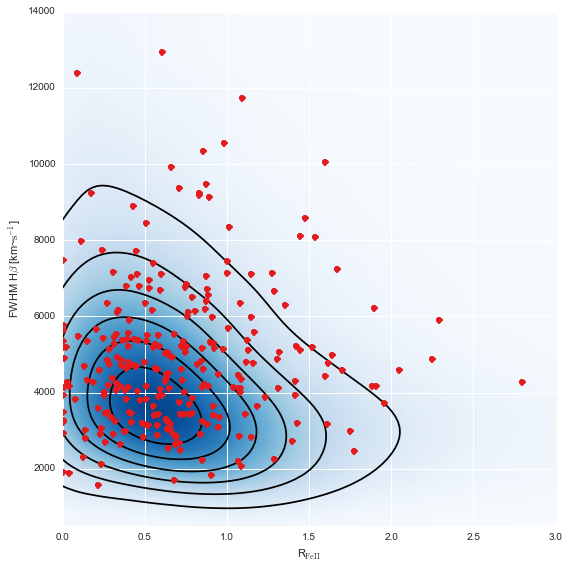

In [314]:
from PlottingTools.kde_contours import kde_contours

from fit_properties_oiii_fire import get_line_fit_props as get_line_fit_props_fire
from fit_properties_oiii_gnirs import get_line_fit_props as get_line_fit_props_gnirs
from fit_properties_oiii_isaac import get_line_fit_props as get_line_fit_props_isaac
from fit_properties_oiii_liris import get_line_fit_props as get_line_fit_props_liris
from fit_properties_oiii_niri import get_line_fit_props as get_line_fit_props_niri
from fit_properties_oiii_nirspec import get_line_fit_props as get_line_fit_props_nirspec
from fit_properties_oiii_sofi_jh import get_line_fit_props as get_line_fit_props_sofi_jh
from fit_properties_oiii_sofi_lc import get_line_fit_props as get_line_fit_props_sofi_lc
from fit_properties_oiii_triple import get_line_fit_props as get_line_fit_props_triple
from fit_properties_oiii_triple_shen15 import get_line_fit_props as get_line_fit_props_triple_shen15
from fit_properties_oiii_xshooter import get_line_fit_props as get_line_fit_props_xshooter
from fit_properties_oiii_sinfoni import get_line_fit_props as get_line_fit_props_sinfoni
from fit_properties_oiii_sinfoni_kurk import get_line_fit_props as get_line_fit_props_sinfoni_kurk

from SpectraTools.fit_line import wave2doppler, doppler2wave

df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 

# removes missing hb 
df = df[df.OIII_FIT_HB_Z_FLAG > 0]   
print len(df)

# remove duplicates 
df.drop(['QSO330',
         'QSO461',
         'QSO424',
         'QSO409',
         'QSO115',
         'QSO348',
         'QSO349',
         'QSO372',
         'QSO379',
         'QSO040',
         'QSO015',
         'QSO384',
         'QSO137',
         'QSO635',
         'QSO146',
         'QSO373',
         'QSO610',
         'QSO048',
         'QSO236',
         'QSO162',
         'QSO412',
         'QSO343',
         'QSO333'],
         inplace=True)

print len(df)

df['OIII_FIT_FE_STRENGTH'] = df.OIII_FIT_EQW_FE_4434_4684 / df.OIII_FIT_HB_BROAD_EQW


# Missing Fe --------------------

q_fire = get_line_fit_props_fire().all_quasars() 
q_gnirs = get_line_fit_props_gnirs().all_quasars() 
q_isaac = get_line_fit_props_isaac().all_quasars() 
q_liris = get_line_fit_props_liris().all_quasars() 
q_niri = get_line_fit_props_niri().all_quasars() 
q_nirspec = get_line_fit_props_nirspec().all_quasars() 
q_sofi_jh = get_line_fit_props_sofi_jh().all_quasars() 
q_sofi_lc = get_line_fit_props_sofi_lc().all_quasars() 
q_triple = get_line_fit_props_triple().all_quasars() 
q_triple_shen15 = get_line_fit_props_triple_shen15().all_quasars() 
q_xshooter = get_line_fit_props_xshooter().all_quasars() 
q_sinfoni = get_line_fit_props_sinfoni().all_quasars()
q_sinfoni_kurk = get_line_fit_props_sinfoni_kurk().all_quasars()

q = q_fire + q_gnirs + q_isaac + q_liris + q_niri + q_nirspec + q_sofi_jh + q_sofi_lc + q_triple + q_triple_shen15 + q_xshooter + q_sinfoni + q_sinfoni_kurk

names = np.array([qi.name for qi in q])

w0=4862.721*u.AA

for idx, row in df.iterrows():

    qi = q[np.where(names == idx)[0][0]]

    continuum_region = qi.continuum_region[0] 

    if continuum_region.unit == (u.km/u.s):
        continuum_region = doppler2wave(continuum_region, w0)

    df.ix[idx, 'intersection'] = len(set(range(int(continuum_region.value[0]), int(continuum_region.value[1]))).intersection(range(4434, 4684)))


df = df[df.intersection > 150.0] # about half the full region (250 pixels)

df.drop('QSO509', inplace=True) # no fe region (might be others, I haven't been very careful)

print len(df)

df = df[df.FE_FLAG == 0] # not bad Fe fit 

print len(df)

df.dropna(subset=['OIII_FIT_FE_STRENGTH_ERR'], inplace=True) 
# removes two with nan's, but fe clearly poorly 
# constrained so just drop

print len(df)


# ---------------------------------------------------------------


yerr = df.OIII_FIT_HB_BROAD_FWHM_ERR / df.OIII_FIT_HB_BROAD_FWHM 
xerr = df.OIII_FIT_FE_STRENGTH_ERR

good = (yerr < 0.5) & (xerr < 0.5)
df = df[good]

print len(df)

fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.plot(df.OIII_FIT_FE_STRENGTH,
        df.OIII_FIT_HB_BROAD_FWHM,
        linestyle='',
        marker='o',
        markerfacecolor=cs[0])


# SDSS ---------------------------------------------------------------

t = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits') 

xi = t['EW_FE_HB_4434_4684'] / t['EW_BROAD_HB']
yi = t['FWHM_BROAD_HB'] 

drop = np.isnan(xi) | np.isnan(yi) | np.isinf(xi) | np.isinf(yi)

xi = xi[~drop]
yi = yi[~drop]

xmin = 0.0
xmax = 3.0
ymin = 500.0
ymax = 14000.0 

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([xi, yi])

kernel = stats.gaussian_kde(values)

Z = np.reshape(kernel(positions).T, X.shape)


kde_contours(xi, 
             yi, 
             ax, 
             color='black',
             lims=[xmin, xmax, ymin, ymax],
             plotpoints=False)

ax.imshow(np.flipud(Z.T), 
      extent=(xmin, xmax, ymin, ymax), 
      aspect='auto', 
      zorder=0, 
      cmap='Blues',
      vmax=0.00015)

# -----------------------------------------

ax.set_xlim(None, None)
ax.set_ylim(None, 14000) 

ax.set_xlabel(r'R$_{\rm FeII}$')
ax.set_ylabel(r'FWHM H$\beta$ [km~$\rm{s}^{-1}$]')

fig.tight_layout()



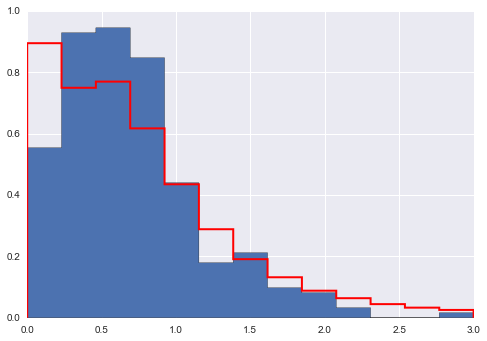

In [353]:
plt.hist(df.OIII_FIT_FE_STRENGTH, normed=True, bins=np.linspace(0, 3, 14), histtype='stepfilled')
plt.hist(xi, normed=True, bins=np.linspace(0, 3, 14), histtype='step', color='red', lw=2);


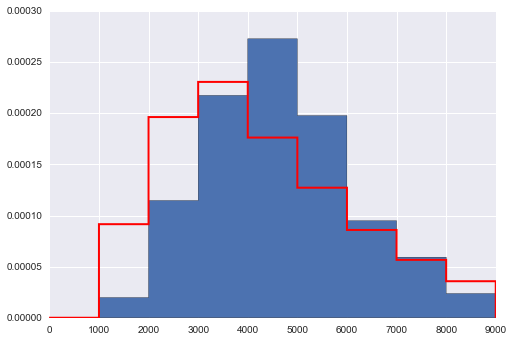

In [361]:
plt.hist(df.OIII_FIT_HB_BROAD_FWHM, normed=True, bins=np.arange(0, 10000, 1000), histtype='stepfilled')
plt.hist(yi, normed=True, bins=np.arange(0, 10000, 1000), histtype='step', color='red', lw=2);

(array([ 0.89477755,  0.74949201,  0.76959937,  0.61721712,  0.43506809,
         0.28859976,  0.19101993,  0.13207776,  0.08831468,  0.06387044,
         0.0445516 ,  0.03311801,  0.02562703]),
 array([ 0.        ,  0.23076923,  0.46153846,  0.69230769,  0.92307692,
         1.15384615,  1.38461538,  1.61538462,  1.84615385,  2.07692308,
         2.30769231,  2.53846154,  2.76923077,  3.        ]),
 <a list of 1 Patch objects>)

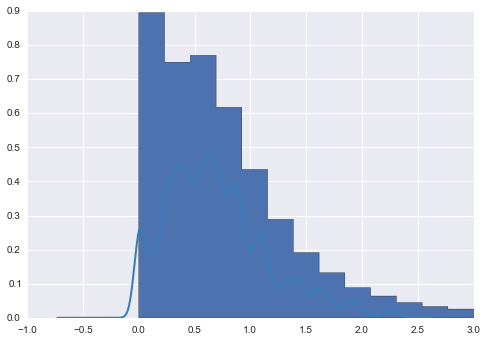

In [355]:
xnew = df.OIII_FIT_FE_STRENGTH * 1.0 

std = np.std(xnew)
mean = np.mean(xnew)
    
xnew = (xnew - mean) / std
    
x_d = np.linspace(-3, 4, 1000)

# bandwidths = 10 ** np.linspace(-2, 0, 100)
# grid = GridSearchCV(KernelDensity(kernel='gaussian'),
#                     {'bandwidth': bandwidths},
#                     cv=LeaveOneOut(len(xnew)))
# grid.fit(xnew[:, None]);

# print grid.best_params_

kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
kde.fit(xnew[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.plot(x_d * std + mean, np.exp(logprob), color=cs[1], lw=2, label='This work')

# plt.xlim(0, 3)

plt.hist(xi, normed=True, bins=np.linspace(0, 3, 14), histtype='stepfilled')

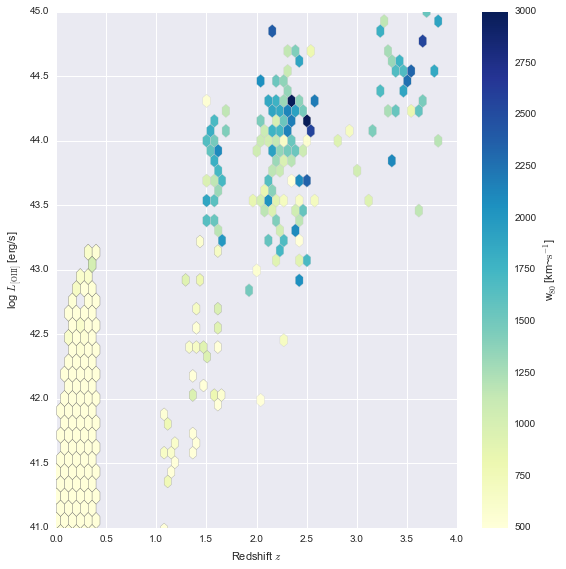

In [414]:
from astropy.cosmology import WMAP9 as cosmoWMAP
import math

greys = palettable.colorbrewer.sequential.Greys_4.mpl_colors

fig, ax = plt.subplots(figsize=(8,8))

props = {'vmin': 500.0, 
         'vmax': 3000.0, 
         'cmap': 'YlGnBu', 
         'edgecolor':'None'}

# Mullaney

t = Table.read('/data/lc585/Mullaney13/ALPAKA_liam.fits')
t = t[t['AGN_TYPE'] == 1] # Only type 1 AGN 

ax.hexbin(t['Z'],
          np.log10(t['OIII_5007_LUM']),
          C=t['w80'],
          vmin=props['vmin'],
          vmax=props['vmax'],
          cmap=props['cmap'],
          gridsize=(5, 25),
          edgecolor=greys[3])


# Our sample ------------------------------------------------

df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 
df = df[df.OIII_FLAG_2 > 0]
df = df[df.OIII_EQW_FLAG == 0]
df = df[df.OIII_SNR_FLAG == 0]
df = df[df.OIII_BAD_FIT_FLAG == 0]
df = df[df.FE_FLAG == 0]

ax.hexbin(df.z_IR.values, 
          df.OIII_5007_LUM_2, 
          C=df.OIII_5007_W80,
          vmin=props['vmin'],
          vmax=props['vmax'],
          cmap=props['cmap'],
          gridsize=(30, 20),
          edgecolor=greys[1])

# Harrison+16 ----------------------------------------------------------------

df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/harrison+16.dat', index_col=0)

df.SA.replace(to_replace='<(.*)', value=np.nan, inplace=True, regex=True)
df.SB.replace(to_replace='<(.*)', value=np.nan, inplace=True, regex=True)

df[['SA', 'SB']] = df[['SA', 'SB']].apply(pd.to_numeric)

df[['SA', 'SB']] = df[['SA', 'SB']].fillna(value=0.0)

df['SA+SB'] = df['SA'] + df['SB']

df = df[df['SA+SB'] > 0.0] 

flx = df['SA+SB'].values * 1.0e-17 * u.erg / u.s / u.cm / u.cm 

lumdist = cosmoWMAP.luminosity_distance(df['zL'].values).to(u.cm) 

lum_oiii = flx * (1.0 + df['zL'].values) * 4.0 * math.pi * lumdist**2 

im = ax.hexbin(df.zL, 
               np.log10(lum_oiii.value), 
               C=df.W80,
               vmin=props['vmin'],
               vmax=props['vmax'],
               cmap=props['cmap'],
               gridsize=(8, 15),
               edgecolor=greys[2])

#---------------------------------------------------------------------------

cb = fig.colorbar(im) 
cb.set_label(r'w$_{80}$ [km~$\rm{s}^{-1}$]')

ax.set_xlim(0, 4)
ax.set_ylim(41, 45)

ax.set_xlabel(r'Redshift $z$')
ax.set_ylabel(r'log $L_{\rm[OIII]}$ [erg/s]')

fig.tight_layout()


In [393]:
# Mullaney

t = Table.read('/data/lc585/Mullaney13/ALPAKA_liam.fits')
t = t[t['AGN_TYPE'] == 1] # Only type 1 AGN 
t = t[['Z', 'OIII_5007_LUM', 'w80']]
df1 = t.to_pandas() 
df1.rename(columns={'Z': 'z', 'OIII_5007_LUM': 'OIII_LUM', 'w80': 'w80'}, inplace=True)
df1['OIII_LUM'] = np.log10(df1['OIII_LUM'])

# Our sample ------------------------------------------------

df2 = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 
df2 = df2[df2.OIII_FLAG_2 > 0]
df2 = df2[df2.OIII_EQW_FLAG == 0]
df2 = df2[df2.OIII_SNR_FLAG == 0]
df2 = df2[df2.OIII_BAD_FIT_FLAG == 0]
df2 = df2[df2.FE_FLAG == 0]

df2 = df2[['z_IR', 'OIII_5007_LUM_2', 'OIII_5007_W80']]
df2.rename(columns={'z_IR': 'z', 'OIII_5007_LUM_2': 'OIII_LUM', 'OIII_5007_W80': 'w80'}, inplace=True)

# Harrison+16 ----------------------------------------------------------------

df3 = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/harrison+16.dat', index_col=0)

df3.SA.replace(to_replace='<(.*)', value=np.nan, inplace=True, regex=True)
df3.SB.replace(to_replace='<(.*)', value=np.nan, inplace=True, regex=True)

df3[['SA', 'SB']] = df3[['SA', 'SB']].apply(pd.to_numeric)

df3[['SA', 'SB']] = df3[['SA', 'SB']].fillna(value=0.0)

df3['SA+SB'] = df3['SA'] + df3['SB']

df3 = df3[df3['SA+SB'] > 0.0] 

flx = df3['SA+SB'].values * 1.0e-17 * u.erg / u.s / u.cm / u.cm 

lumdist = cosmoWMAP.luminosity_distance(df3['zL'].values).to(u.cm) 

lum_oiii = flx * (1.0 + df3['zL'].values) * 4.0 * math.pi * lumdist**2 

df3['OIII_LUM'] = np.log10(lum_oiii.value)

df3 = df3[['zL', 'OIII_LUM', 'W80']]
df3.rename(columns={'zL': 'z', 'OIII_LUM': 'OIII_LUM', 'W80': 'w80'}, inplace=True)

df = pd.concat([df2, df3], ignore_index=True)


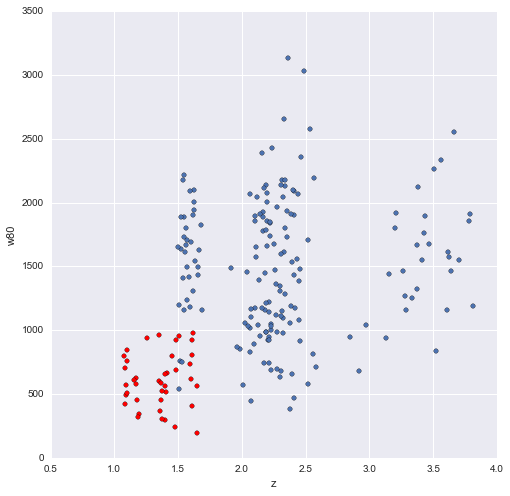

In [395]:
fig, ax = plt.subplots(figsize=(8,8))
df2.plot(kind='scatter', x='z', y='w80', ax=ax)
df3.plot(kind='scatter', x='z', y='w80', ax=ax, color='red')

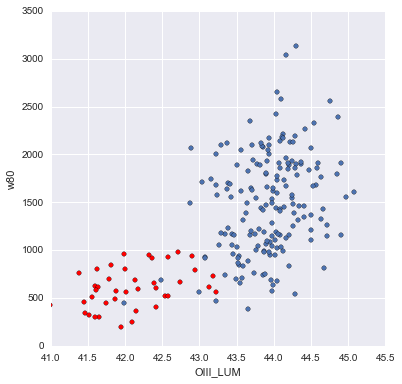

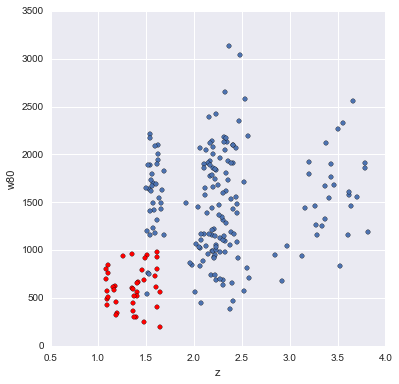

In [412]:
df2 = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 
df2 = df2[df2.OIII_FLAG_2 > 0]
df2 = df2[df2.OIII_EQW_FLAG == 0]
df2 = df2[df2.OIII_SNR_FLAG == 0]
df2 = df2[df2.OIII_BAD_FIT_FLAG == 0]
df2 = df2[df2.FE_FLAG == 0]

fig, ax = plt.subplots(figsize=(6,6))

df2.plot(kind='scatter', x='OIII_5007_LUM_2', y='OIII_5007_W80', ax=ax)
df3.plot(kind='scatter', x='OIII_LUM', y='w80', ax=ax, color='red')
ax.set_xlim(41, 45.5)

fig, ax = plt.subplots(figsize=(6, 6))
df2.plot(kind='scatter', x='z_IR', y='OIII_5007_W80', ax=ax)
df3.plot(kind='scatter', x='z', y='w80', ax=ax, color='red')


In [391]:
df3 = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/harrison+16.dat', index_col=0)
print df3.columns

Index([u'zA', u'Type', u'F0.5-2', u'F2-10', u'Obs', u'Inst', u'te', u'Note',
       u'zL', u'SA', u'FWA', u'SB', u'FWB', u'Deltav', u'S_NII', u'W80'],
      dtype='object')
